[View in Colaboratory](https://colab.research.google.com/github/bz10bis/colaboratorySave/blob/master/ConvAE.ipynb)

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 178us/step - loss: 0.2146 - val_loss: 0.1712
Epoch 2/50
60000/60000 [==============================] - 9s 154us/step - loss: 0.1579 - val_loss: 0.1437
Epoch 3/50
46464/60000 [======================>.......] - ETA: 1s - loss: 0.1430

60000/60000 [==============================] - 9s 151us/step - loss: 0.1418 - val_loss: 0.1383
Epoch 4/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1330 - val_loss: 0.1276
Epoch 5/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1272 - val_loss: 0.1270
Epoch 6/50
25216/60000 [===========>..................] - ETA: 4s - loss: 0.1239

60000/60000 [==============================] - 9s 145us/step - loss: 0.1237 - val_loss: 0.1209
Epoch 7/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1211 - val_loss: 0.1168
Epoch 8/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1184 - val_loss: 0.1210
Epoch 9/50
22144/60000 [==========>...................] - ETA: 5s - loss: 0.1172

60000/60000 [==============================] - 9s 145us/step - loss: 0.1167 - val_loss: 0.1181
Epoch 10/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1153 - val_loss: 0.1140
Epoch 11/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1141 - val_loss: 0.1134
Epoch 12/50
20096/60000 [=========>....................] - ETA: 5s - loss: 0.1128

60000/60000 [==============================] - 9s 144us/step - loss: 0.1128 - val_loss: 0.1109
Epoch 13/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1118 - val_loss: 0.1135
Epoch 14/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1107 - val_loss: 0.1084
Epoch 15/50
20096/60000 [=========>....................] - ETA: 5s - loss: 0.1103

60000/60000 [==============================] - 9s 146us/step - loss: 0.1099 - val_loss: 0.1080
Epoch 16/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1091 - val_loss: 0.1102
Epoch 17/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1088 - val_loss: 0.1054
Epoch 18/50
20096/60000 [=========>....................] - ETA: 5s - loss: 0.1080

60000/60000 [==============================] - 9s 145us/step - loss: 0.1080 - val_loss: 0.1079
Epoch 19/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1078 - val_loss: 0.1072
Epoch 20/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1074 - val_loss: 0.1097
Epoch 21/50
20096/60000 [=========>....................] - ETA: 5s - loss: 0.1068

60000/60000 [==============================] - 9s 147us/step - loss: 0.1070 - val_loss: 0.1032
Epoch 22/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1063 - val_loss: 0.1023
Epoch 23/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1059 - val_loss: 0.1036
Epoch 24/50
20096/60000 [=========>....................] - ETA: 5s - loss: 0.1054

60000/60000 [==============================] - 9s 145us/step - loss: 0.1054 - val_loss: 0.1043
Epoch 25/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1053 - val_loss: 0.1038
Epoch 26/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1049 - val_loss: 0.1029
Epoch 27/50
20096/60000 [=========>....................] - ETA: 5s - loss: 0.1049

60000/60000 [==============================] - 9s 145us/step - loss: 0.1048 - val_loss: 0.1061
Epoch 28/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1043 - val_loss: 0.1013
Epoch 29/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1041 - val_loss: 0.1020
Epoch 30/50
20480/60000 [=========>....................] - ETA: 5s - loss: 0.1040

60000/60000 [==============================] - 9s 144us/step - loss: 0.1039 - val_loss: 0.1024
Epoch 31/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1035 - val_loss: 0.1015
Epoch 32/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1034 - val_loss: 0.1032
Epoch 33/50
20992/60000 [=========>....................] - ETA: 5s - loss: 0.1027

60000/60000 [==============================] - 9s 145us/step - loss: 0.1027 - val_loss: 0.1006
Epoch 34/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.1026 - val_loss: 0.1003
Epoch 35/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1024 - val_loss: 0.0992
Epoch 36/50
20864/60000 [=========>....................] - ETA: 5s - loss: 0.1028

60000/60000 [==============================] - 9s 142us/step - loss: 0.1026 - val_loss: 0.0998
Epoch 37/50
60000/60000 [==============================] - 8s 139us/step - loss: 0.1021 - val_loss: 0.1003
Epoch 38/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1020 - val_loss: 0.1065
Epoch 39/50
24320/60000 [===========>..................] - ETA: 4s - loss: 0.1017

60000/60000 [==============================] - 9s 144us/step - loss: 0.1017 - val_loss: 0.1024
Epoch 40/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1015 - val_loss: 0.0995
Epoch 41/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1015 - val_loss: 0.0988
Epoch 42/50
22144/60000 [==========>...................] - ETA: 5s - loss: 0.1017

60000/60000 [==============================] - 9s 147us/step - loss: 0.1014 - val_loss: 0.1004
Epoch 43/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1015 - val_loss: 0.1017
Epoch 44/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1012 - val_loss: 0.0999
Epoch 45/50
21376/60000 [=========>....................] - ETA: 5s - loss: 0.1005

60000/60000 [==============================] - 9s 145us/step - loss: 0.1008 - val_loss: 0.1002
Epoch 46/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.1005 - val_loss: 0.1017
Epoch 47/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1003 - val_loss: 0.0997
Epoch 48/50
21888/60000 [=========>....................] - ETA: 5s - loss: 0.1005

60000/60000 [==============================] - 9s 142us/step - loss: 0.1003 - val_loss: 0.0997
Epoch 49/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.1002 - val_loss: 0.0976
Epoch 50/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.1001 - val_loss: 0.0986


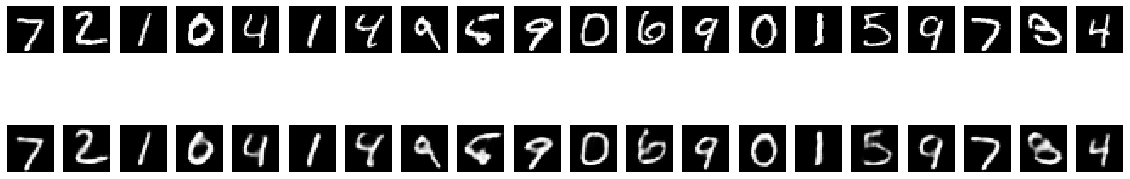

In [8]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()